Importing Libraries

In [1]:
import matplotlib.pyplot as plt  #plotting graphs
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LogisticRegression # for classification and matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score,roc_curve, auc,accuracy_score,f1_score

Extracting Dataset

In [2]:
data = pd.read_csv("../Data/cleaned_tweets.csv")

In [3]:
data.head(5)

,Unnamed: 0,id,entity,sentiment,tweet
0,0,2401,Borderlands,Positive,"['im', 'get', 'borderland', 'murder']"
1,1,2401,Borderlands,Positive,"['come', 'border', 'kill']"
2,2,2401,Borderlands,Positive,"['im', 'get', 'borderland', 'kill']"
3,3,2401,Borderlands,Positive,"['im', 'come', 'borderland', 'murder']"
4,4,2401,Borderlands,Positive,"['im', 'get', 'borderland', '2', 'murder']"


In [4]:
print(data.shape)
print(data.info())

(43013, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43013 entries, 0 to 43012
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  43013 non-null  int64 
 1   id          43013 non-null  int64 
 2   entity      43013 non-null  object
 3   sentiment   43013 non-null  object
 4   tweet       43013 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.6+ MB
None


Exploratory Data Analysis

In [5]:
data.sentiment.unique() #two classes for target variable

array(['Positive', 'Negative'], dtype=object)

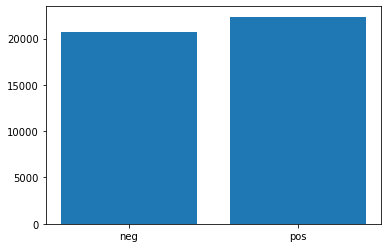

In [6]:
#distribution of classes in dataset
classes = data.sentiment.unique()
counts = []
for i in classes:
    count= len(data[data.sentiment==i])
    counts.append(count)
plt.bar(['neg','pos'],counts)
plt.show()

In [7]:
#sb.pairplot(data)

Splitting the Dataset

In [8]:
x = data.tweet.values # test column using tweet
y = data.sentiment.values #target column


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42,test_size= 0.25)


Vectorize

In [10]:
#tweet data will be indexed
vectorizer = CountVectorizer()
vectorizer.fit(x_train)

vectorizer.fit(x_test)
x_train = vectorizer.transform(x_train)
x_test = vectorizer.transform(x_test)


In [11]:
print("after vectorising : " ,x_train[0])

after vectorising :    (0, 1184)	1
  (0, 1946)	1
  (0, 2008)	1
  (0, 2222)	1
  (0, 2307)	1
  (0, 2371)	1
  (0, 2476)	1
  (0, 5089)	1
  (0, 5120)	2
  (0, 5297)	1
  (0, 5528)	1
  (0, 5562)	1
  (0, 6818)	2
  (0, 7749)	1
  (0, 8031)	1
  (0, 8298)	1
  (0, 8818)	2
  (0, 9138)	1


Building the MOdel

In [12]:
#using logistic regression for binary classification
classifier = LogisticRegression (max_iter=1000)
classifier.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [13]:
score = classifier.score(x_test, y_test)
print("accuracy", score)

accuracy 0.8927840803421982


Confusion Matrix

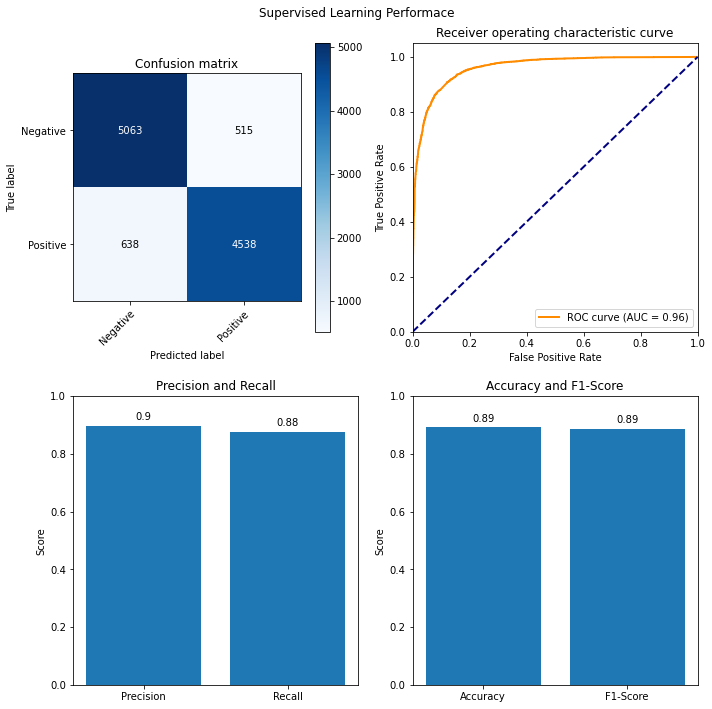

In [14]:
#plots
# assume y_true is the true labels and y_pred is the predicted labels
def row_label(row):
    return 1 if row["sentiment"]=="Positive" else 0

data["label"] = data.apply(row_label, axis=1)
# df_tweets["tweet"] = df_tweets.apply(remove_brakets, axis=1)
data.drop("sentiment",axis=1, inplace=True)

data.drop_duplicates()

x = data.tweet.values # test column using tweet
y = data.label.values #target column

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42,test_size= 0.25)

#tweet data will be indexed
vectorizer = CountVectorizer()
vectorizer.fit(x_train)

vectorizer.fit(x_test)
x_train = vectorizer.transform(x_train)
x_test = vectorizer.transform(x_test)

#using logistic regression for binary classification
classifier = LogisticRegression (max_iter=1000)
classifier.fit(x_train,y_train)

#start
y_true = np.array(y_test)
test_features = x_test
predicted_sentiments = classifier.predict(test_features)
y_pred = np.array(predicted_sentiments)
y_score = classifier.predict_proba(test_features)[:, 1]
# calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)



# create figure with 2 rows and 2 columns of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# plot confusion matrix
ax = axs[0,0]
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=["Negative", "Positive"],
       yticklabels=["Negative", "Positive"],
       title="Confusion matrix",
       ylabel='True label',
       xlabel='Predicted label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")

# plot precision,accuracy, F1 and recall
# calculate precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

ax = axs[1,0]
ax.bar(["Precision", "Recall"], [precision, recall])
ax.set_ylim(0, 1)
ax.set_ylabel("Score")
ax.set_title("Precision and Recall")
for i, v in enumerate([precision, recall ]):
    ax.text(i, v + 0.02, str(round(v, 2)), ha='center')

#accuracy, F1
ax = axs[1,1]
ax.bar(["Accuracy" , "F1-Score"], [ acc, f1])
ax.set_ylim(0, 1)
ax.set_ylabel("Score")
ax.set_title("Accuracy and F1-Score")
for i, v in enumerate([acc, f1]):
    ax.text(i, v + 0.02, str(round(v, 2)), ha='center')


#ROC Curve


# calculate false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_true, y_score)

# calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# plot ROC curve
ax =  axs[0,1]
ax.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic curve')
ax.legend(loc="lower right")

# remove axis labels for the bottom right subplot
# axs[1, 1].axis('off')

# add a figure title
fig.suptitle('Supervised Learning Performace')

# adjust subplot spacing and layout
fig.tight_layout()

# show the plot
plt.show()



In [15]:
# y_pred =  classifier.predict(x_test)
# cm = confusion_matrix(y_test, y_pred, labels = data.sentiment.unique())
# data_cm =  pd.DataFrame(cm, index = data.sentiment.unique(), columns = data.sentiment.unique()) 
# data_cm

Percentage Representation

In [16]:
# data_cm_percentage = data_cm.copy()
# for i in data_cm_percentage:
#     data_cm_percentage[i] = data_cm_percentage[i] /data_cm_percentage[i].sum()
    
# data_cm_percentage


In [17]:
# x_test

Testing

In [18]:
# tweet = 'Well done, Congrats'
# vectTweet =  vectorizer.transform(np.array([tweet ])) #vectorize the tweet using the vectorizer 
# prediction = classifier.predict(vectTweet) #to predict the class of the tweet 
# print('Tweet is','positive' if prediction[0]== "Positive" else 'negative')
      